# Project 2: Classifying Popular Songs

## Introducing The Problem

I've always wondered how songs become popular seemingly out of nowhere, specifically, songs by lesser-known artists. Of course, marketing, including social media, plays a significant role, but what exactly captivates people and propels a song to popularity? I'm sure there's a point where genre influences current popularity. For instance, in 2023, a pop song is more likely to top the charts compared to a newly-released classical piece. Why? And can we predict whether a song is currently popular based solely on its features?

## Introducing The Data

In [1]:
#import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


I'm going to be using a data set from November 2022 containing spotify songs and their attributes.

I found the data on [Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download). According to the author, the data set was "collected using Spotify's Web API and Python."

In [4]:
df.shape

(114000, 21)

The dataset contains 114,000 rows (songs) and 21 columns. The feature descriptions are as follows:

- track_id: The Spotify ID for the track
- artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- album_name: The album name in which the track appears
- track_name: Name of the track
- <strong>popularity</strong>: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- duration_ms: The track length in milliseconds
- explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- loudness: The overall loudness of a track in decibels (dB)
- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- track_genre: The genre in which the track belongs

## Pre-Processing The Data

In [5]:
df_cleaned = df.rename(columns={'Unnamed: 0':'index'})

First, I'm going to give the unnamed column a name.

In [6]:
df_cleaned.isna().sum()

index               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Searching for null values.

In [7]:
df_cleaned[df_cleaned['artists'].isna()]

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Looks like all 3 null values from the previous step are in the same row, so this will get dropped since we don't have a clue on who it belongs to.

In [8]:
df_cleaned = df_cleaned.dropna()

<br>

In [9]:
df_cleaned['track_name'].unique().size

73608

Next, I wanted to see how many tracks were unique and found out that almost <strong>half</strong> the tracks were duplicates.

In [10]:
df_cleaned = df_cleaned.drop_duplicates(subset=['track_name'], keep='last')

Dropping the duplicate tracks by their names

In [11]:
df_cleaned.shape

(73608, 21)

From 140,000 rows to 73,608 rows.

In [12]:
df_cleaned['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Let's look at the genres in the data.

In [13]:
df_cleaned = df_cleaned[df_cleaned['track_genre'] != 'sleep']
df_cleaned = df_cleaned[df_cleaned['track_genre'] != 'comedy']

Because we only care about songs, we'll drop sleep and comedy tracks.

In [14]:
df_cleaned = df_cleaned.drop(['index','artists','track_id','album_name','track_name','liveness'], axis = 1)

Finally, we're dropping columns that don't contribute and columns that may lead to overfitting.

In [15]:
df_cleaned.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre
2,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.210,0.000000,0.120,76.332,4,acoustic
14,56,188133,False,0.755,0.780,2,-6.084,1,0.0327,0.124,0.000028,0.387,120.004,4,acoustic
32,0,234186,False,0.593,0.455,6,-8.192,1,0.0388,0.366,0.000000,0.564,202.019,4,acoustic
40,0,306794,False,0.474,0.519,7,-5.291,1,0.0253,0.281,0.000000,0.326,151.832,4,acoustic
54,52,171543,False,0.576,0.331,6,-9.389,0,0.0306,0.894,0.000034,0.407,149.020,4,acoustic


## Data Visualization

Out of the remaining features, I anticipate that the danceability, energy, and genre features would have the most impact on a song with popularity. Let's plot these.

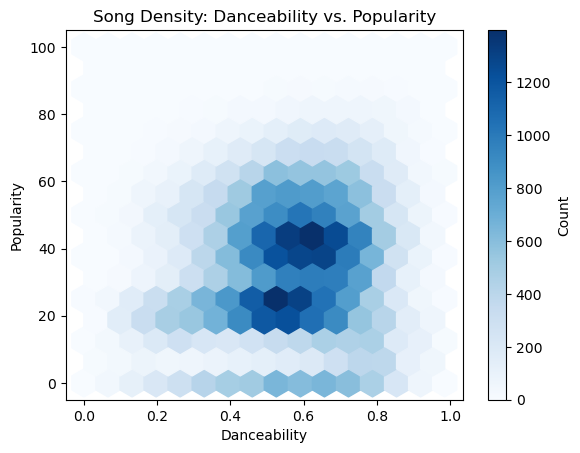

In [16]:
x = df_cleaned['danceability']
y = df_cleaned['popularity']
plt.hexbin(x, y, gridsize=15, cmap='Blues')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Song Density: Danceability vs. Popularity')
plt.colorbar(label='Count')

This hexbin plot represents the relationship between danceability and popularity for a dataset of songs. Each bin represents the density of songs with the corresponding danceability and popularity values. There's a notable cluster for songs with moderate danceability and moderate popularity. Not much can be said about a correlation but there is a concentration of songs falling in the middle for both features.

Text(0.5, 1.0, 'Song Density: Energy vs. Popularity')

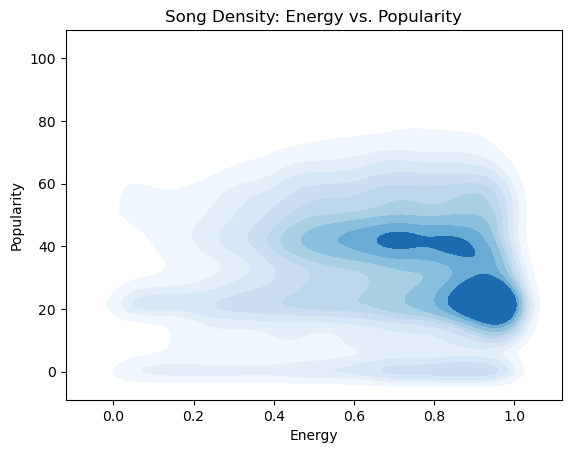

In [17]:
sns.kdeplot(data=df_cleaned,x='energy', y='popularity',cmap='Blues', fill=True)
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Song Density: Energy vs. Popularity')

This kernel density estimation (KDE) plot works similar to the hexbin plot. The darker hue illustrates a higher concentration of songs with the corresponding energy and popularity values. As shown, there seems to be a cluster at very high energy levels and moderate popularity. Again, no strong correlation but i found it surprising to see highly concentrated areas for both plots.

In [18]:
df_pie = df_cleaned.groupby('track_genre')['popularity'].sum()
df_pie = df_pie.sort_values(ascending=False)

In [19]:
df_pie = df_pie.head(10)

Text(0.5, 1.0, 'The 10 Most Popular Genres Found')

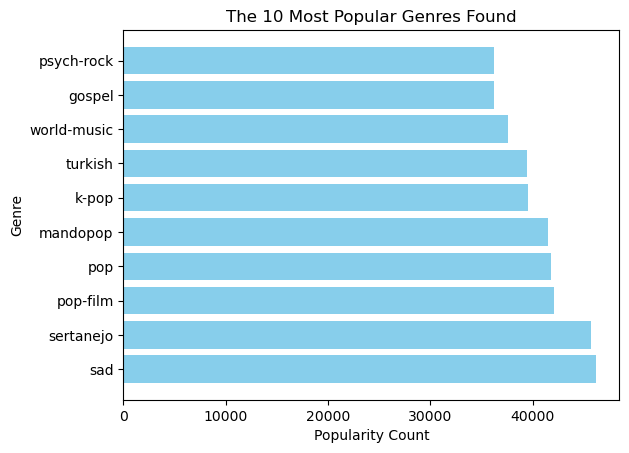

In [20]:
plt.barh(df_pie.index, df_pie.values, color='skyblue')
plt.xlabel('Popularity Count')
plt.ylabel('Genre')
plt.title('The 10 Most Popular Genres Found')

Finally, this bar chart depicts the 10 most popular genres found in the dataset. This was found by grouping track genres and summing their popularity counts. This chart shows how diverse the dataset is, I hadn't heard of some these genres before.

## Modeling

I'm going to be using a decision tree because I want to gain insight on what specific features makes a song popular. Decision trees are would help me solve that because they classify data by using the most impactful features on each level. Decision trees are also easy to visualize, although they are prone to overfitting and are biased towards dominant classes.

In order to use a decision tree, I need to convert the explicit and genre columns into numerical values.

In [21]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['explicit','track_genre'])

In [22]:
popularity_75th_percentile = df_cleaned['popularity'].quantile(0.75)
df_cleaned["popularity_75th_percentile"] = (df_cleaned['popularity'] >= popularity_75th_percentile).astype(int)

I arbitrarily consider songs in the 75th percentile of popularity values in the data set to be popular. I create a new column determining if each track is "popular" or not

In [23]:
X = df_cleaned.drop(columns=['popularity','popularity_75th_percentile'])
y = df_cleaned['popularity_75th_percentile']

Next, we need to set our X and y values. X contains the features, y contains the target, in this case, our target is the 75th percentile.

In [24]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import tree, metrics

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
clf = tree.DecisionTreeClassifier() #instantiate Decision Tree class
clf = clf.fit(X_train, y_train) #fit training data to the model

Now, I'm splitting the test size to be 20% of the data, while the training size is 80%.

In [26]:
feature_names = X.columns.tolist()
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi=3000)
tree.plot_tree(clf, max_depth = 1, feature_names = feature_names, filled=True)
plt.show()

The model is trained and here is a visual depiction. As seen above, it looks like the most important feature was whether a song was of the "pop-film" genre. If not, it checks if the track is a "pop" track. If it is a pop-film track, it checks for its energy value. It keeps checking for specific features until it predicts if the track is in the 75th percentile.

## Model Evaluation

The evaluation metric I use first is accuracy. I'm using accuracy because it works best when the dataset is not balanced, like in our case. Accuracy works by calculating the proportion of correct predictions out of total predictions.

In [27]:
clf.score(X_test, y_test)

0.7474388459126071

Looks like our accuracy is about 74%. Let's look at some more evaluation metrics.

In [28]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     10552
           1       0.52      0.53      0.52      3797

    accuracy                           0.75     14349
   macro avg       0.68      0.68      0.68     14349
weighted avg       0.75      0.75      0.75     14349



It looks like our model was better at predicting if a song didn't make the 75th percentile, with an all-around score of 83%. 

In [29]:
fi = clf.feature_importances_
fi = pd.Series(data=fi, index=feature_names).head(15)
fi.sort_values(ascending=False, inplace=True)

Text(0, 0.5, 'Feature')

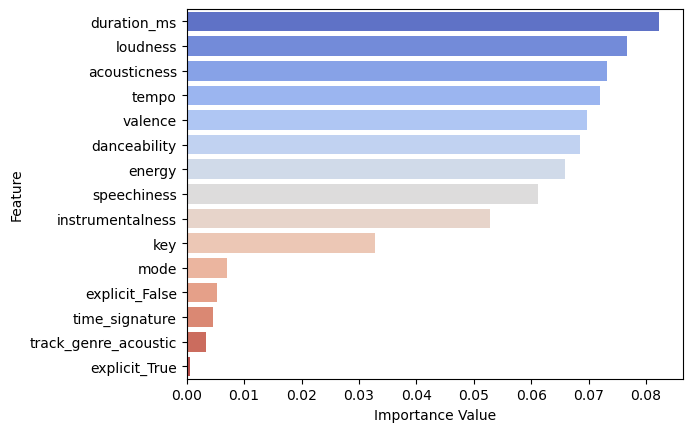

In [30]:
sns.barplot(x=fi, y=fi.index, palette='coolwarm')
plt.xlabel('Importance Value')
plt.ylabel('Feature')

This bar chart shows the most important features determining if a song makes the 75th percentile or not. There is a spread amongst the top 10 features, they all have a big impact on our model's prediction. 

## Storytelling

I learned that the above 10 features play a huge role in the popularity of a song. I was't expecting to see such a spread among so many features. Our model, unfortunately, isn't the most accurate but I was able to see that genre is not as important as I thought it'd be. I was also surprised to see that danceability and energy of a song dont have the <strong>most</strong> impact on a song as I thought they would, they are in the top 10 of most impactful but I imagined them at the top two spots. All in all, this shows that there's a lot that goes into music, especially popular songs.

## Impact

A positive impact this project could have is on the music industry. Songs that have the features of a popular song could have marketing priority compared to other songs. Negative impact could be some of the limitations. For example, the popularity algorithm, our model, and data availability could skew the results and could mislead. Also, the dataset was last updated in November of 2022. This means the current popularity feature reflects data up to that point and does not represent the current popularity of songs.

## References

- [Kaggle Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download)